In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
plt.rcParams['text.usetex'] = True

In [8]:
def getSpline(c):
    x = [1.25,(1.5+1.25)/2,1.5,(1.5+1.75)/2,1.75]
    y = [1,(1+c)/2,c,(1+c)/2,1]
    tck = interpolate.splrep(x, y, s=0)
    
    return x , y , tck

In [20]:
markers = ['s','o','x','.']

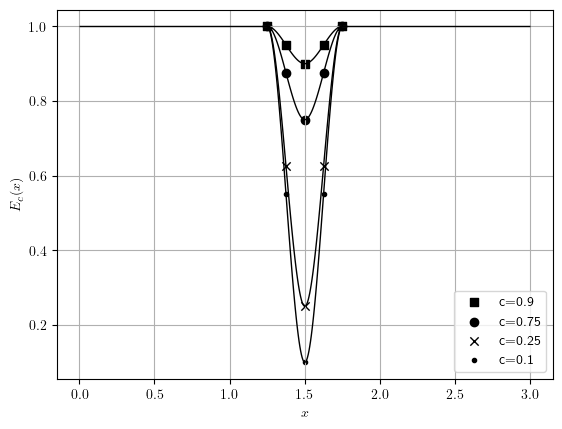

In [29]:
ax = plt.gca()

c = [0.1,0.25,0.75,0.9]
c.reverse()
for val,m in zip(c,markers):
    x,y , tck = getSpline(val)
    plt.scatter(x,y,label="c="+str(val),marker=m,color='black',linewidth=1)
    E = interpolate.splev(np.linspace(1.25,1.75,100), tck, der=0)
    plt.plot(np.linspace(1.25,1.75,100),E,color='black',linewidth=1)




ax.hlines(y=1, xmin=0, xmax=1.25, linewidth=1, color='black')
ax.hlines(y=1, xmin=1.75, xmax=3, linewidth=1, color='black')
plt.grid()
plt.legend(loc="lower right")
plt.xlabel("$x$")
plt.ylabel("$E_c(x)$")
plt.savefig("spline.pdf",bbox_inches='tight')